In [1]:
## Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
## loading the data
url = "https://raw.githubusercontent.com/olivierla412/Files/main/breast%20cancer.csv"

data = pd.read_csv(url)

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
# let's delete the id and  Unnamed: 32 column
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [6]:
data.shape

(569, 31)

In [7]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

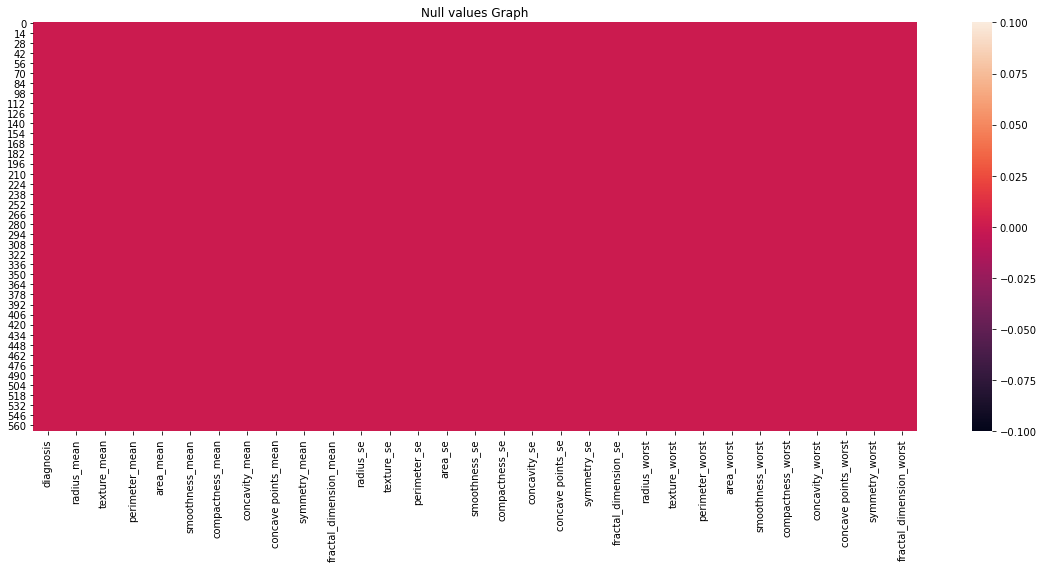

In [8]:
## let's plot it see , how it there is not values or not

plt.figure(figsize=(16,8))
sns.heatmap(data.isnull())
plt.title("Null values Graph")
plt.tight_layout()

In [9]:
X = data.drop('diagnosis',axis=1)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## __Principal Component Analytics ( PCA )__

##### __PCA:__  mean, Dimentional Reduction Technique

In [13]:
pca = PCA()
pca.fit_transform(X_scaled)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

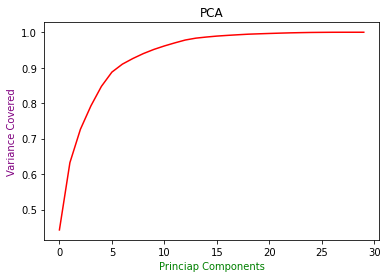

In [14]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_),color ='red')
plt.xlabel("Princiap Components",color ='green')
plt.ylabel("Variance Covered",color ='purple')
plt.title('PCA')
plt.show()

### Around 13 principal Components are able to explain 95% variance.
### It's safe to consider starting 13 Principal components

In [15]:
## instantiate again PCA and give the no of components selected

pca = PCA(n_components=13)
new_pcomp = pca.fit_transform(X_scaled)
princi_comp = pd.DataFrame(new_pcomp,
                          columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13'])
princi_comp

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157117,-0.877404,0.262951,-0.859010,0.103369
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813121,0.157921,-0.943525
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097373,0.024065,0.454277,-0.605602,0.124385,-0.410616
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116974,-1.151511,1.011313,-0.933259
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636376,-0.263805,0.377704,0.651359,-0.110514,0.387944
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256990,-0.062650,0.123341,-0.051717
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105208,-0.108631,0.244806,0.222750,-0.192627
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840512,0.096473,0.157418
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280238,-0.542033,-0.089298,-0.178636,-0.697454,1.225167


In [16]:
## let's replace column diagnosis into binary codes ,called imputing

data['diagnosis'] = data['diagnosis'].replace({'M':1,'B':0})

In [17]:
y = data['diagnosis']

In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

### __SVR__: it's used for Regression problems.
### ................................
### __SVC__: It's used for classification problems.

In [20]:
x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size=0.25,random_state=355)

In [21]:
svc=  SVC()



In [22]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [23]:
print(classification_report(y_test, y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



## Let's go for hyper parameter turning

In [24]:
from sklearn.model_selection import GridSearchCV


### you can used also : __from sklearn.model_selection import RandomizedSearchCV__

In [25]:
# C =   It is a hyperparamter in   SVM to control error. how much error we can allow
#       low C means low error and if we have large C means large error.
# C     alway upperCase

#gamma = Gamma decides that how much curvature we want in a decision boundary.
#Gamma high means more curvature.
##Gamma low means less curvature


param_grid = {
    'C': [0.001,2,3,4,5,6,7,10],
    'gamma': [0.1,0.2,0.3,0.4,0.5,0.6]
}

In [26]:
gridsearch = GridSearchCV(svc,param_grid)

In [27]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 2, 3, 4, 5, 6, 7, 10],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]})

In [28]:
## let's see the best paramter according to gridsearch

gridsearch.best_params_

{'C': 7, 'gamma': 0.1}

In [29]:
svc = SVC(C= 7, gamma=0.1)

In [30]:
svc.fit(x_train, y_train)

SVC(C=7, gamma=0.1)

In [31]:
y_pred = svc.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[92,  1],
       [ 3, 47]])

In [34]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        93
           1       0.98      0.94      0.96        50

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

